In [1]:
from Binaries import *

In [2]:
AllEnergies = Ensemble("120_TwoLayer_FullBandwidth_AllEnergies_NoCuts")
# AllEnergies.money_plot("validation_data")

HighEnergies = Ensemble("120_TwoLayer_FullBandwidth_HighEnergies_NoCuts")
# HighEnergies.money_plot("validation_data")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 40, 4)          40        
                                                                 
 conv1d (Conv1D)             (None, 1, 20, 2)          18        
                                                                 
 flatten (Flatten)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 2)                 82        
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________

ENSEMBLE_120_TwoLayer_FullBandwidth_AllEnergies_NoCuts: 10 models successfully initiated

Model: "sequential"
_________________________________________________________________
 Layer (type)

np.mean(acc) = 0.99958; np.mean(rate) = 7511.30, ratio = 7514.48
np.mean(acc) = 0.99900; np.mean(rate) = 6173.82, ratio = 6179.98


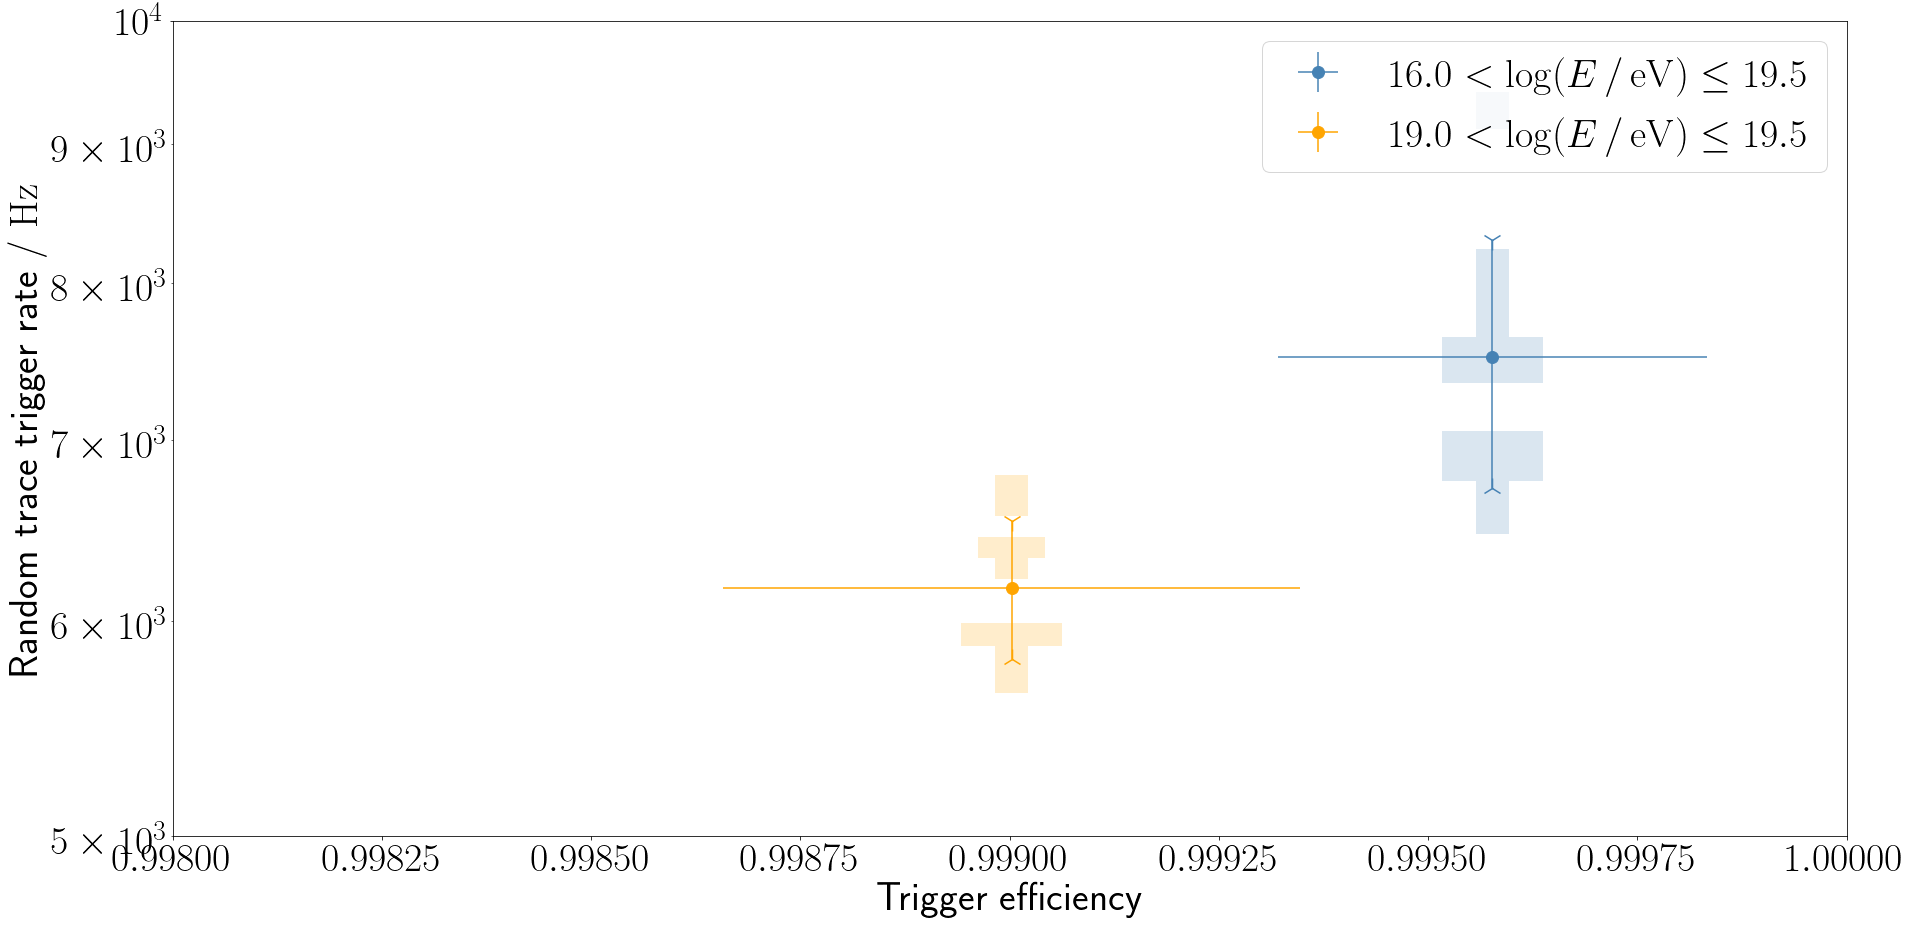

In [12]:
fig, ax = plt.subplots()

ax.set_yscale("log")
ax.set_ylabel("Random trace trigger rate / $\mathrm{Hz}$")
ax.set_xlabel("Trigger efficiency")
ax.set_xlim(0.998, 1)
ax.set_ylim(5 * 10**3, 10**4)

for self in [AllEnergies, HighEnergies]:

    dataset = "validation_data" if self == AllEnergies else "all_energies"
    color = "steelblue" if self == AllEnergies else "orange"
    label = "$16.0 < \mathrm{log}(E\,/\,\mathrm{eV}) \leq 19.5$" if self == AllEnergies else "$19.0 < \mathrm{log}(E\,/\,\mathrm{eV}) \leq 19.5$"

    rate, rate_err = self.get_background_rates()
    acc, acc_err = self.get_accuracy(dataset)

    n_rate, bins = np.histogram(rate, bins = 10)
    current_y, scaling = min(rate), 2e-5
    bin_width = bins[1] - bins[0]
    boxes = []

    for i, rate_bin in enumerate(n_rate):
        boxes.append(Rectangle((np.mean(acc) - scaling * rate_bin, current_y), width = 2*scaling*rate_bin, height = bin_width))
        current_y += bin_width

    print(f"{np.mean(acc) = :.5f}; {np.mean(rate) = :.2f}, ratio = {np.mean(rate) / np.mean(acc) :.2f}")
            
    ax.add_collection(PatchCollection(boxes, facecolor = color, lw = 0, alpha = 0.2))
    plt.errorbar(np.mean(acc), np.mean(rate), xerr = np.std(acc), yerr = np.std(rate), fmt = "o", markersize = 12, c = color, label = label)
    plt.scatter(np.mean(acc), np.mean(rate) + np.std(rate), marker = "1", s = 400, zorder = 4, c = color)
    plt.scatter(np.mean(acc), np.mean(rate) - np.std(rate), marker = "2", s = 400, zorder = 4, c = color)
plt.legend()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 40, 4)          40        
                                                                 
 conv1d (Conv1D)             (None, 1, 20, 2)          18        
                                                                 
 flatten (Flatten)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 2)                 82        
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


Classifier                                    Dataset                                  TP      FP      TN      FN
test_high_energies                            all_energies                

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

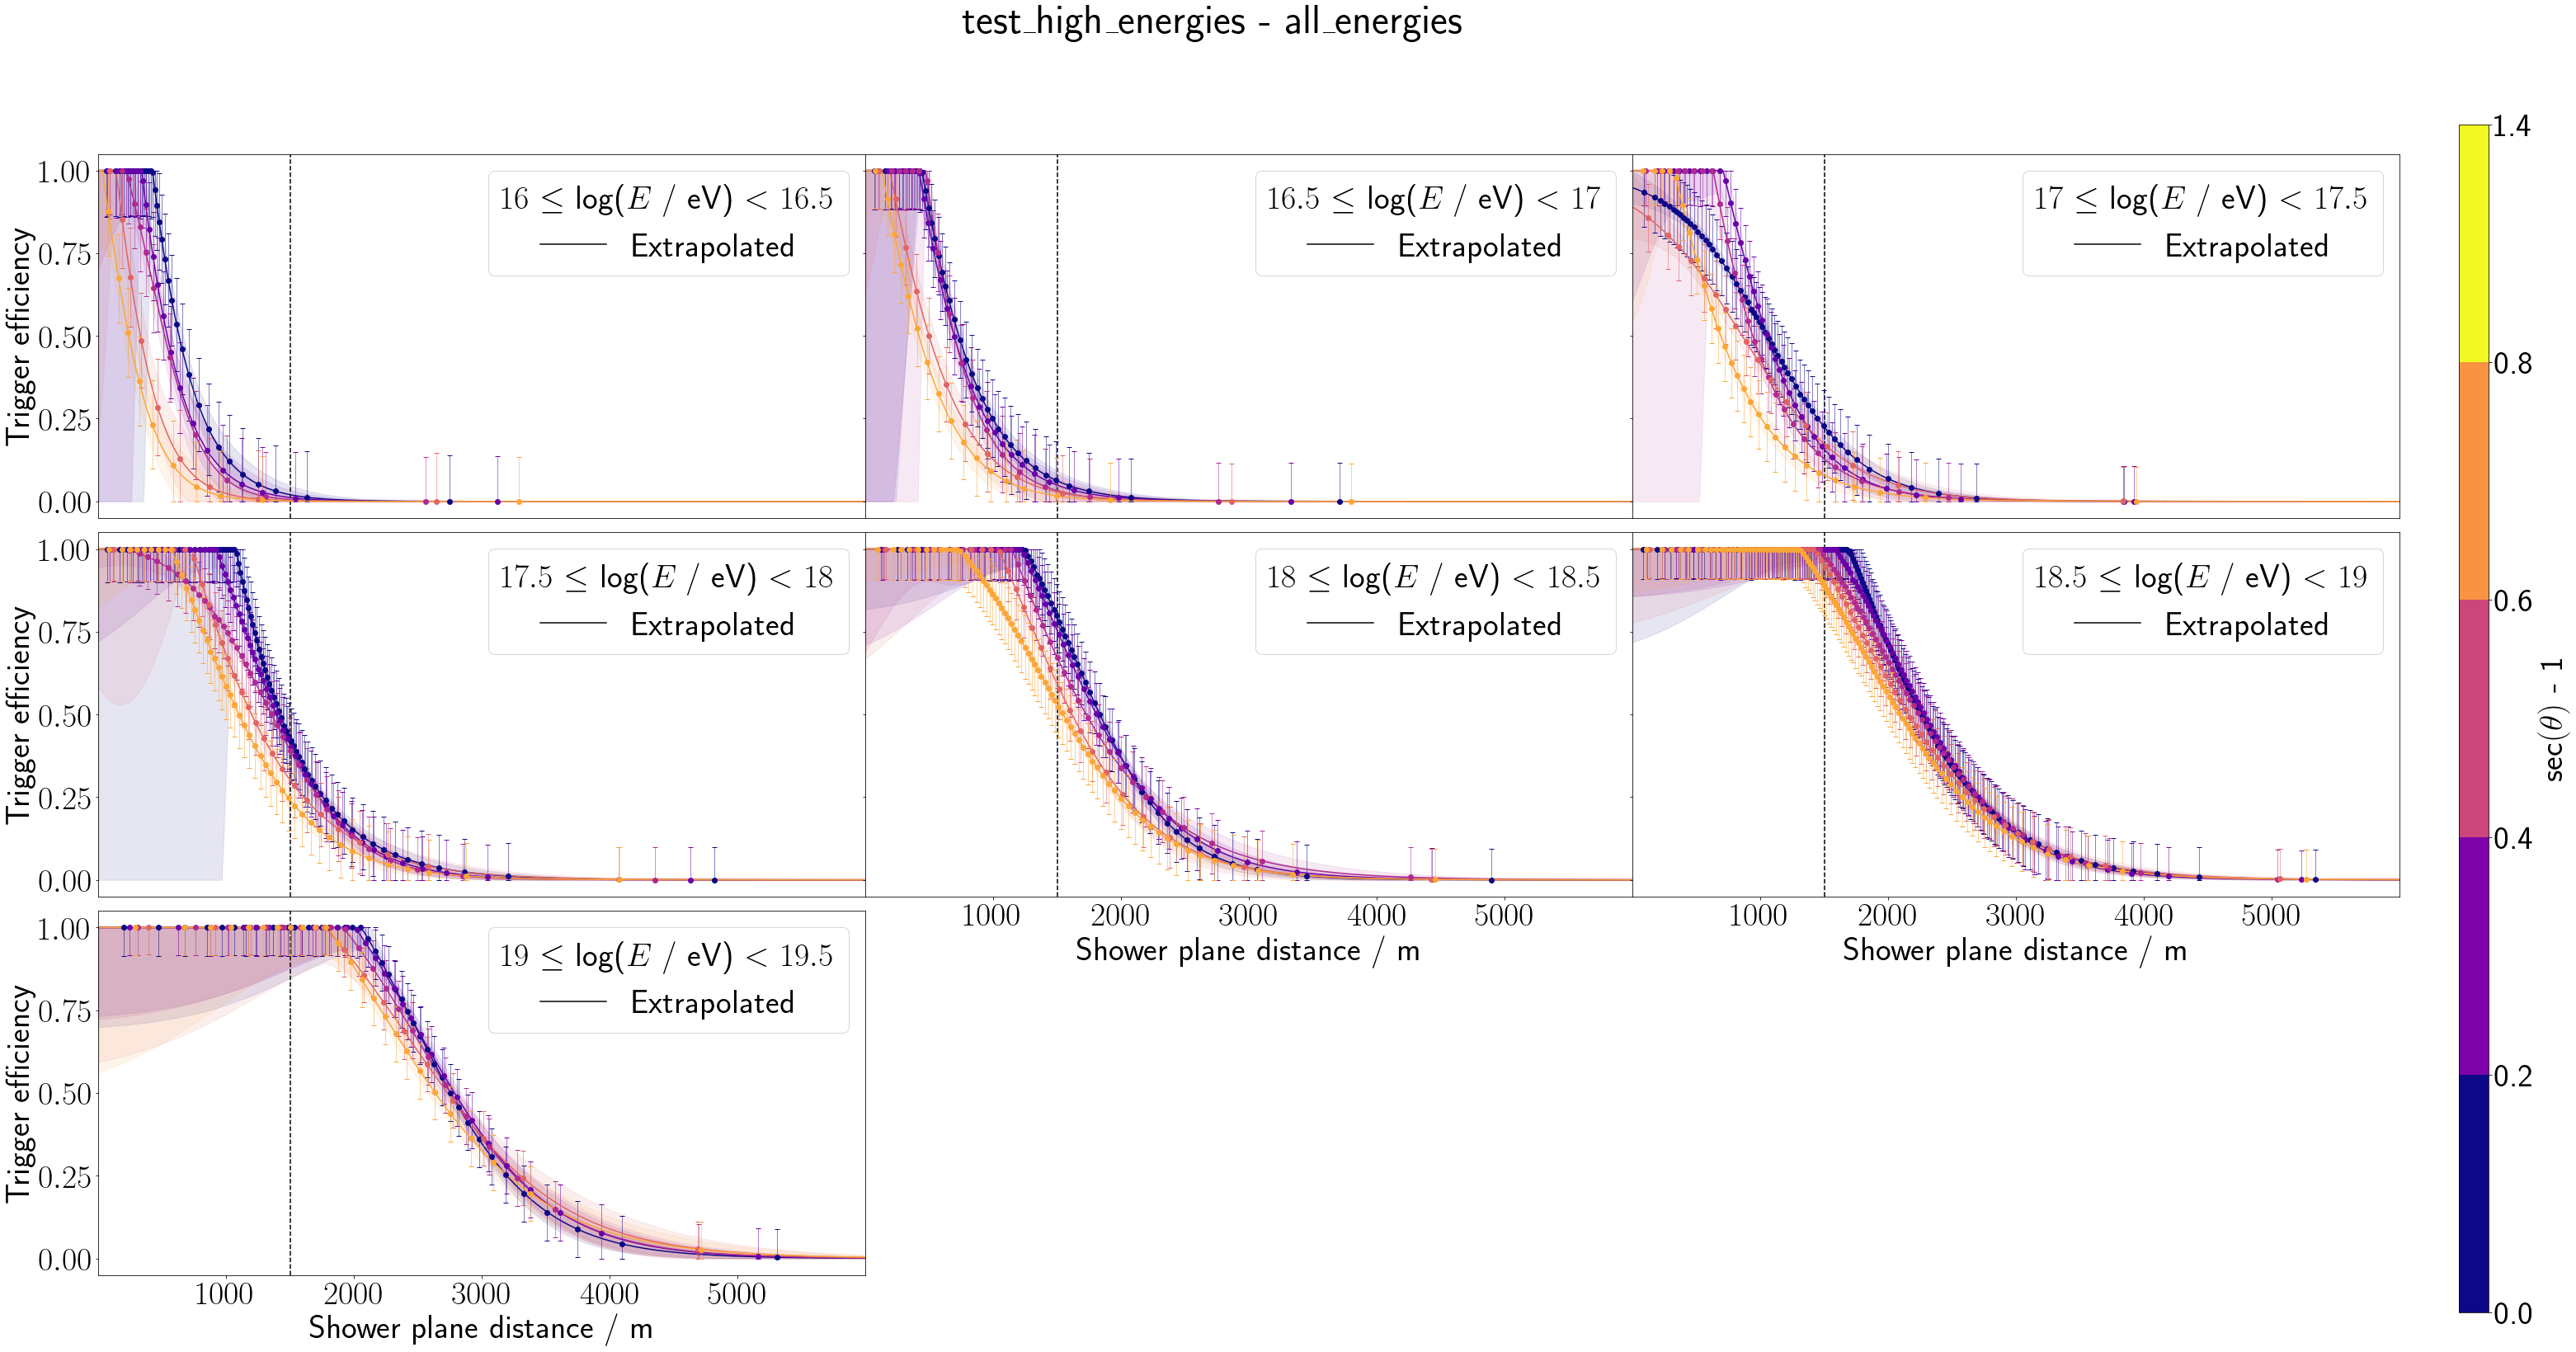

In [1]:
from Binaries import *

NN = NNClassifier("test_high_energies")
NN.spd_energy_efficiency("all_energies")
NN = NNClassifier("test_all_energies")
NN.spd_energy_efficiency("validation_data")